# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Vyacheslav Shiryaev*</center>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

## Solution

### **Model A**

Firstly, let's import all packages that we will be used:

In [117]:
# -*- coding: utf-8 -*-
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib
plt.xkcd()
import numpy as np
import numpy.matlib
import pandas as pd
import scipy as sp
import random
from itertools import groupby
import networkx as nx
%matplotlib inline

Two useful functions. First returns m unique elements from sequence. Second is the same fuction with sequence of exceptions

In [95]:
def random_subset(seq, m):
    """ Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        targets.add(x)
    return list(targets)

In [96]:
def random_subset_exceptions(seq, m, exceptions):
    """ Return m unique elements from seq  with exceptions.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        if not x in exceptions:
            targets.add(x)
    return list(targets)

The next step is defining function to generate a random growing model. It is slightly modified function of B&A model in NetworkX.

In [97]:
# B&A model without prefferential attachment
def barabasi_albert_random_graph(n, m):
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    # Add m initial nodes (m0 in barabasi-speak)
    G=nx.empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source]*m,targets))
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from nodes (random growing)
        nodes = nx.nodes(G)
        targets = random_subset(nodes,m)
        source += 1
    return G

Now, it can be possible to generate random growing graph and plot PDF/CDF

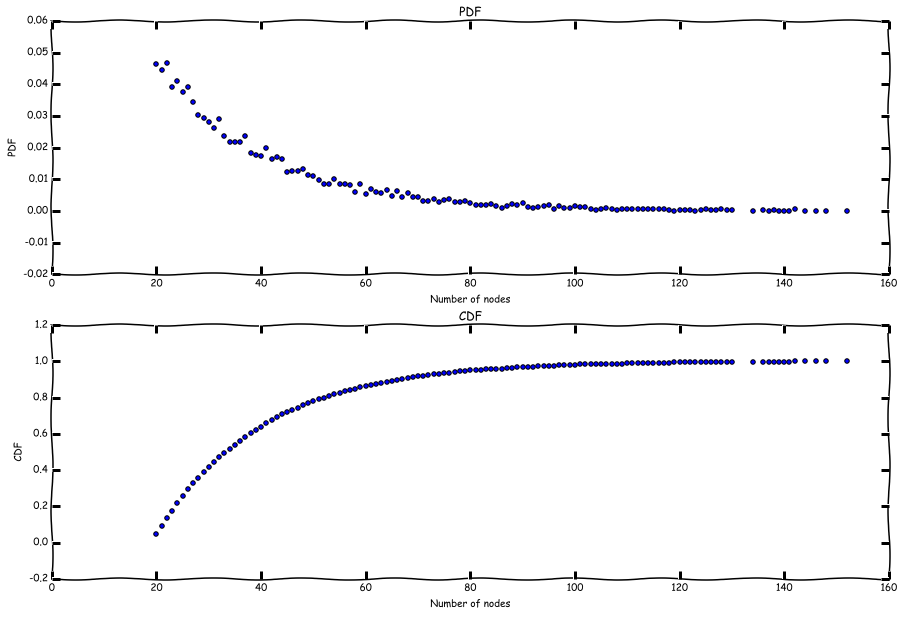

In [323]:
#number of nodes
n = 8000
#number of edges on each step
m = 20

G = barabasi_albert_random_graph(n, m)

degrees = []
freq_degree = []

nks = nx.degree_histogram(G)
for i in xrange(len(nks)):
    if nks[i] != 0:
        freq_degree.append(nks[i])
        degrees.append(i)
        
PDF = pd.Series(freq_degree) / n
CDF = np.cumsum(PDF)

#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
ax.scatter((degrees), (PDF))
ax.set_title('PDF')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('PDF')

ax2 = plt.subplot(212)
ax2.scatter((degrees), (CDF))
ax2.set_title('CDF')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('CDF')

According to plots of PDF/CDF, the degree distribution of this generated graph (n = 10000, m = 20) looks like the Poisson distribution. So, without prefferential attachment, degree distribution of graphs cannot be the Power law.


Let's illustrate the following dependicies:
- average path length to the number of nodes
- average clustering coefficient to the number of nodes
- average node degee to the nodes "age"

Average path length and clustering coefficient to the number of nodes
There will be several dependicies for different parameter m. 
In order to save computional time, there will be two m parameters (10 and 50) and n range from 1000 to 3000 with step of 100

In [324]:
n_test = list(np.linspace(1000, 3000, 21))
m_test = [10, 50]

av_clust_coef = np.matlib.zeros((len(n_test),len(m_test)))
av_path_length = np.matlib.zeros((len(n_test),len(m_test)))

for i in m_test:
    for j in n_test:
        G_test = barabasi_albert_random_graph(j, i)
        av_path_length[n_test.index(j), m_test.index(i)] = nx.average_shortest_path_length(G_test)
        av_clust_coef[n_test.index(j), m_test.index(i)] = nx.average_clustering(G_test)

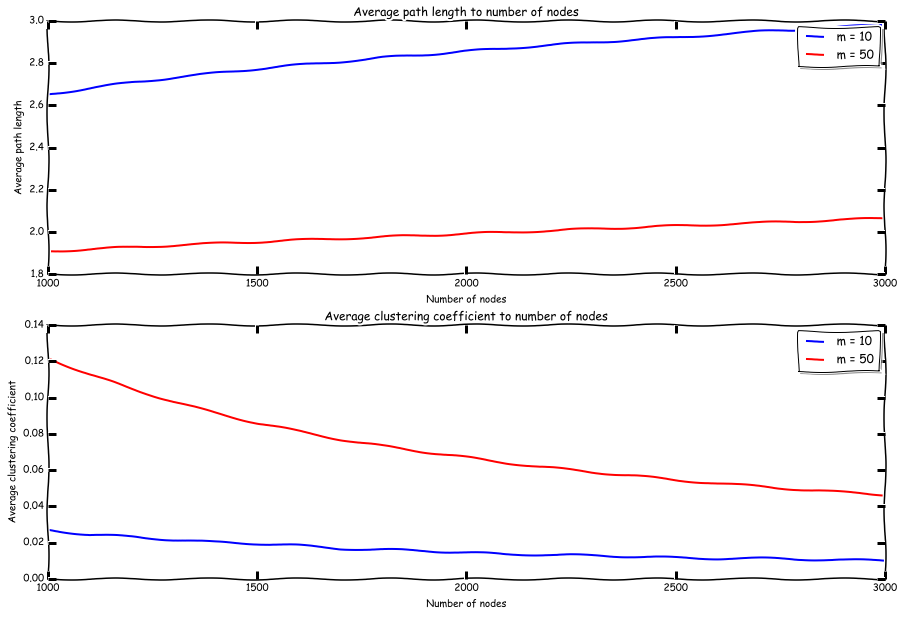

In [325]:
#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
ax.plot(n_test[:], av_path_length[:,0], label = 'm = 10')
ax.plot(n_test, av_path_length[:,1], label = 'm = 50')
ax.legend(loc='upper right', shadow=True)
ax.set_title('Average path length to number of nodes')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Average path length')

ax2 = plt.subplot(212)
ax2.plot(n_test, av_clust_coef[:,0], label = 'm = 10')
ax2.plot(n_test, av_clust_coef[:,1], label = 'm = 50')
ax2.legend(loc='upper right', shadow=True)
ax2.set_title('Average clustering coefficient to number of nodes')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('Average clustering coefficient')

The first thing is the dependency on number of nodes. Average path length grows with n and average clustering coefficient decreases. Also, less m leads to less average path length, but it still growing trend. As for the clustering coefficient, there is inverse situation. Moreover, in case, there m = 50, CC falls faster than with m = 10.

Average node degee to the nodes "age". To better view, there will be used quite high parameters

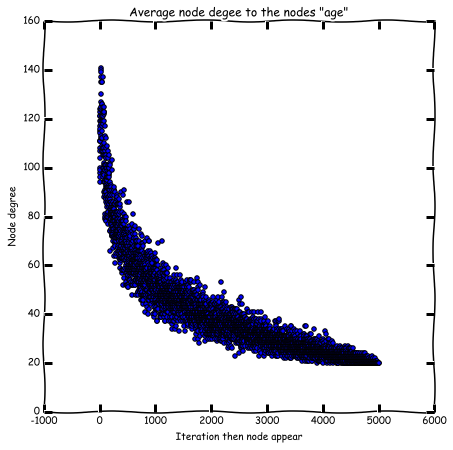

In [364]:
#script to look at average node degee to the nodes "age"
n = 5000
m = 20
G = barabasi_albert_random_graph(n,m)
deg = nx.degree(G)
nodes_age = deg.keys()
nodes_age[:m] = [0]*m
node_degree = deg.values()

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax = plt.scatter(nodes_age,node_degree)
plt.title('Average node degee to the nodes "age"')
plt.xlabel('Iteration then node appear')
plt.ylabel('Node degree')

In picture, the older nodes in left side and the younger nodes in the right side. It easy to see the main trend of dependency. "Oldest" nodes have highest node degree. Also, it is reely looks like the figure in the lecture. Moreover, higher m parameter better represent dependency. At higher m valuse, there interesting feature. Some oldest nodes do not match the main trend and do not have highest node degree.

### **Model B**

Firstly, let's define fuction to generate this type of the graph

In [194]:
# generate B&A non growing graph
def barabasi_albert_non_growing_graph(n, m):
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n)) 
    
    # add initial nodes
    G = nx.empty_graph(n)
    nodes = nx.nodes(G) #nodes list
    repeated_nodes = list(xrange(n))
    targets = [ repeated_nodes[i] for i in sorted(random.sample(xrange(len(repeated_nodes)), m)) ]
    
    while len(nodes) > 0:
        # choose node to add edges
        num_node = random.choice(nodes)
        #print 'Номер выбранного узла', num_node
        #add edges
        G.add_edges_from(zip([num_node]*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([num_node]*m)
        #print 'All nodes', repeated_nodes
        #pick targets
        exceptions = G.neighbors(num_node)
        exceptions.append(num_node)
        targets = random_subset_exceptions(repeated_nodes, m, exceptions)
        #targets = random_subset(repeated_nodes, m)
        #print 'targets:', targets
        #remove num node from nodes to choose
        nodes.remove(num_node)
    return G

Let's generate this graph with n = 10000, m = 20 and look at PDF/CDF

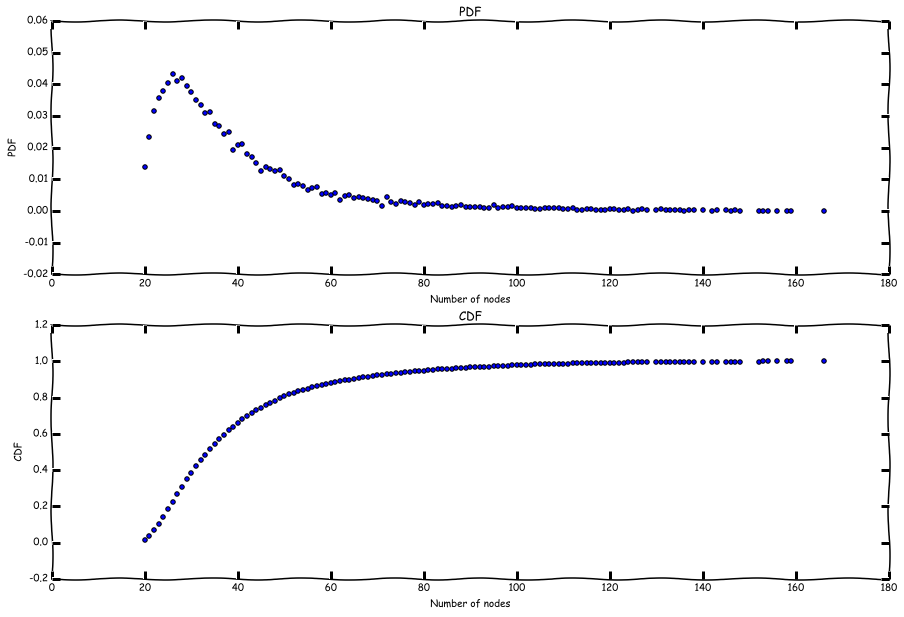

In [188]:
#number of nodes
n = 10000
#number of edges on each step
m = 20

G = barabasi_albert_non_growing_graph(n, m)

degrees = []
freq_degree = []

nks = nx.degree_histogram(G)
for i in xrange(len(nks)):
    if nks[i] != 0:
        freq_degree.append(nks[i])
        degrees.append(i)
        
PDF = pd.Series(freq_degree) / n
CDF = np.cumsum(PDF)

#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
ax.scatter((degrees), (PDF))
ax.set_title('PDF')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('PDF')

ax2 = plt.subplot(212)
ax2.scatter((degrees), (CDF))
ax2.set_title('CDF')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('CDF')

According to plots of PDF/CDF, the degree distribution of this generated graph (n = 10000, m = 20) pretty looks like the Poisson distribution. So, without growing, degree distribution of graphs cannot be the Power law.

Let's illustrate the following dependicies:
- average path length to the number of nodes
- average clustering coefficient to the number of nodes
- average node degee to the nodes "age"

Average path length and clustering coefficient to the number of nodes
There will be several dependicies for different parameter m. 
In order to save computional time, there will be two m parameters (10 and 50) and n range from 1000 to 3000 with step of 100

In [327]:
n_test = list(np.linspace(1000, 3000, 21))
m_test = [10, 50]

av_clust_coef = np.matlib.zeros((len(n_test),len(m_test)))
av_path_length = np.matlib.zeros((len(n_test),len(m_test)))


for i in m_test:
    for j in n_test:
        G_test = barabasi_albert_non_growing_graph(int(j), i)
        av_path_length[n_test.index(j), m_test.index(i)] = nx.average_shortest_path_length(G_test)
        av_clust_coef[n_test.index(j), m_test.index(i)] = nx.average_clustering(G_test)

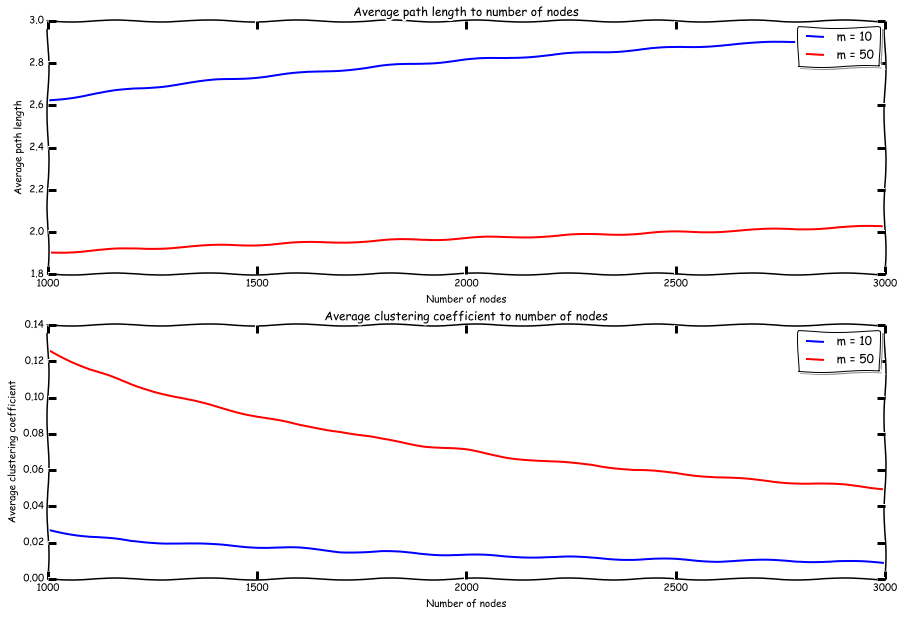

In [329]:
#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
ax.plot(n_test[:], av_path_length[:,0], label = 'm = 10')
ax.plot(n_test, av_path_length[:,1], label = 'm = 50')
ax.legend(loc='upper right', shadow=True)
ax.set_title('Average path length to number of nodes')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Average path length')

ax2 = plt.subplot(212)
ax2.plot(n_test, av_clust_coef[:,0], label = 'm = 10')
ax2.plot(n_test, av_clust_coef[:,1], label = 'm = 50')
ax2.legend(loc='upper right', shadow=True)
ax2.set_title('Average clustering coefficient to number of nodes')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('Average clustering coefficient')

It's interesting results because, there are pretty much the same picture as in a case of random frowing graph. However, exact results is slightly different from previous model.

Average node degee to the nodes "age". This model without growing and all nodes appeared at the one time. So, there is no sense of this dependency.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

## Solution

Let's define the function to generate this model. The first model is for undirected graphs, and second for directed ones (this model will be considered further).

In [328]:
# generate undirected vertex copying graph
def vertex_copying_graph(n, q):
    if q > 1 or q < 0:
        msg = "NetworkXError p={0} is not in [0,1].".format(p)
        raise nx.NetworkXError(msg)
    if n < 2:
        msg = 'n must be greater than or equal to 2'
        raise nx.NetworkXError(msg)
    
    G = nx.Graph()
    G.graph['name'] = "Vertex copying Graph"

    # Initialize the graph with two connected nodes.
    G.add_edge(0,1)
    i = 2
    while i < n:
        # Choose a random node from current graph to duplicate.
        random_node = random.choice(G.nodes())
        # Nodes before adding
        nodes = G.nodes()
        # Make the replica.
        G.add_node(i)
        for nbr in G.neighbors(random_node):
            if random.random() < q:
                # Link retention step.
                G.add_edge(i, nbr)
            else:
                # Select randomly node to connect
                new_nbr = random_subset_exceptions(nodes, 1, [nbr])[0]
                G.add_edge(i, new_nbr)
                # Remove added neighbor to prevent edge duplication
                nodes.remove(new_nbr)
        # Successful duplication.
        i += 1
    # remove possible parallel edges
    G = nx.Graph(G)
    return G

Now, it is possible to generate this type of graph and plot the PDF and CDF.

Done


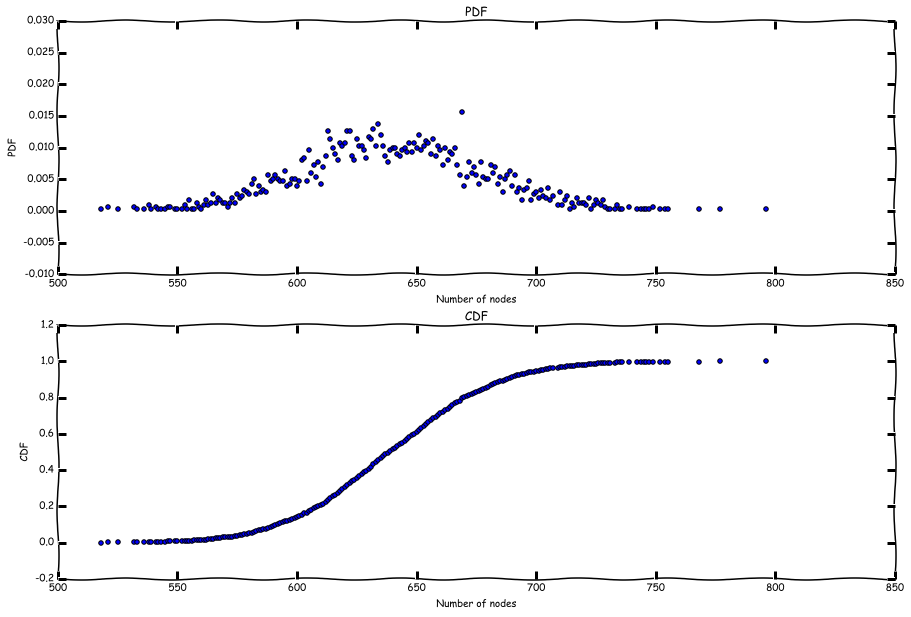

In [335]:
#number of nodes
n = 3000
#number of edges on each step
q = 0.3

G = vertex_copying_graph(n, q)

print 'Done'
degrees = []
freq_degree = []

nks = nx.degree_histogram(G)
for i in xrange(len(nks)):
    if nks[i] != 0:
        freq_degree.append(nks[i])
        degrees.append(i)
        
PDF = pd.Series(freq_degree) / n
CDF = np.cumsum(PDF)

#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
ax.scatter((degrees), (PDF))
ax.set_title('PDF')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('PDF')

ax2 = plt.subplot(212)
ax2.scatter((degrees), (CDF))
ax2.set_title('CDF')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('CDF')

According to plots of PDF/CDF, the degree distribution of this generated graph (n = 3000, m = 0.3) looks like the Normal distribution.

Let's illustrate the following dependicies:
- average path length to the number of nodes
- average clustering coefficient to the number of nodes
- average node degee to the nodes "age"

Average path length and clustering coefficient to the number of nodes
There will be several dependicies for different parameter q. 
In order to save computional time, there will be two m parameters (0.2 and 0.9) and n range from 1000 to 3000 with step of 200

In [332]:
n_test = list(np.linspace(1000, 3000, 11))
q_test = [0.2, 0.9]

av_clust_coef = np.matlib.zeros((len(n_test),len(q_test)))
av_path_length = np.matlib.zeros((len(n_test),len(q_test)))


for i in q_test:
    for j in n_test:
        G_test = vertex_copying_graph(int(j), i)
        av_path_length[n_test.index(j), q_test.index(i)] = nx.average_shortest_path_length(G_test)
        av_clust_coef[n_test.index(j), q_test.index(i)] = nx.average_clustering(G_test)

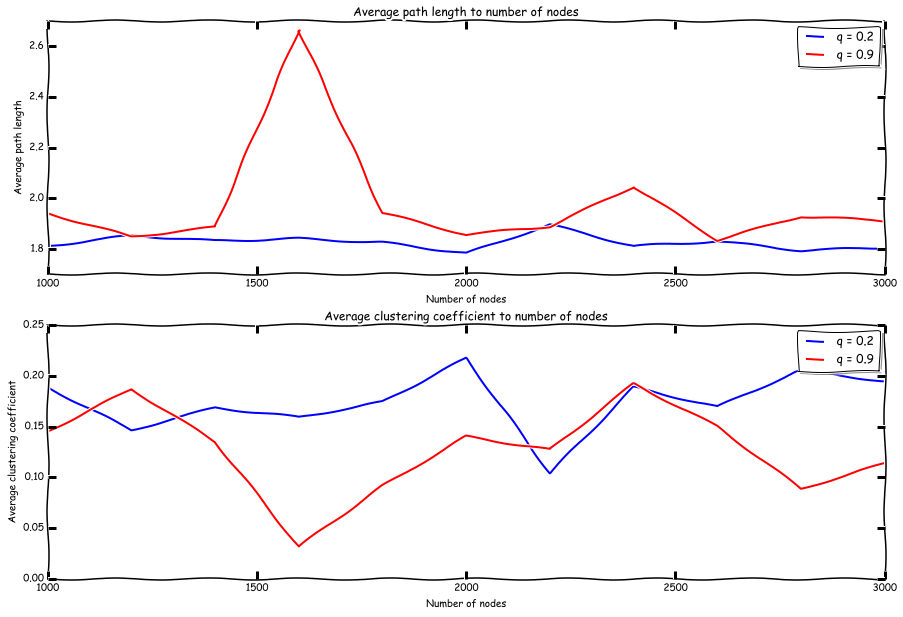

In [366]:
#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
ax.plot(n_test[:], av_path_length[:,0], label = 'q = 0.2')
ax.plot(n_test, av_path_length[:,1], label = 'q = 0.9')
ax.legend(loc='upper right', shadow=True)
ax.set_title('Average path length to number of nodes')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Average path length')

ax2 = plt.subplot(212)
ax2.plot(n_test, av_clust_coef[:,0], label = 'q = 0.2')
ax2.plot(n_test, av_clust_coef[:,1], label = 'q = 0.9')
ax2.legend(loc='upper right', shadow=True)
ax2.set_title('Average clustering coefficient to number of nodes')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('Average clustering coefficient')

It hard to make assumtions about the dependency in these pictures. The hypothesis is that avearge path length does not depend on the number of nodes and q. And the same hypothesis for average CC.

Average node degee to the nodes "age". It is better to see three different q parameters, because they leads to different results.

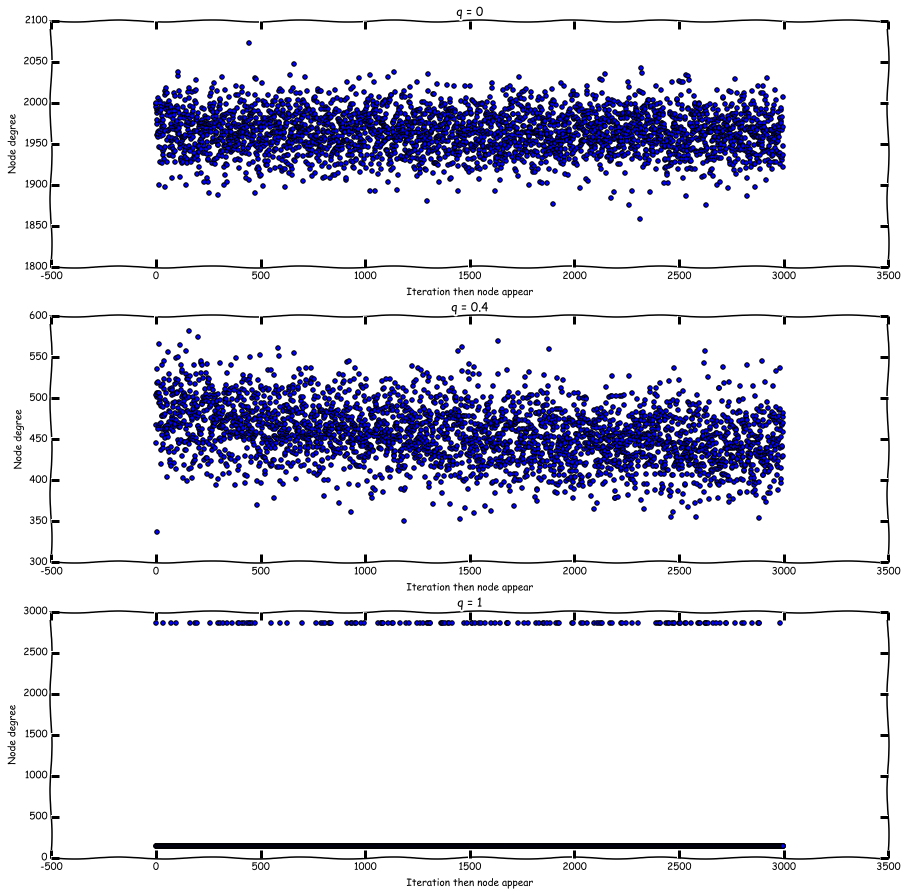

In [360]:
#script to look at average node degee to the nodes "age"
n = 3000
q = [0, 0.4, 1]
G1 = vertex_copying_graph(n,q[0])
G2 = vertex_copying_graph(n,q[1])
G3 = vertex_copying_graph(n,q[2])


deg1 = nx.degree(G1)
deg2 = nx.degree(G2)
deg3 = nx.degree(G3)
nodes_age = deg1.keys()
nodes_age[:2] = [0]*2

node_degree1 = deg1.values()
node_degree2 = deg2.values()
node_degree3 = deg3.values()

fig = plt.figure(3)
fig.set_size_inches(15, 15, forward=True)
ax = plt.subplot(311)
ax.scatter(nodes_age, node_degree1)
ax.set_title('q = 0')
ax.set_xlabel('Iteration then node appear')
ax.set_ylabel('Node degree')

ax1 = plt.subplot(312)
ax1.scatter(nodes_age, node_degree2)
ax1.set_title('q = 0.4')
ax1.set_xlabel('Iteration then node appear')
ax1.set_ylabel('Node degree')

ax2 = plt.subplot(313)
ax2.scatter(nodes_age, node_degree3)
ax2.set_title('q = 1')
ax2.set_xlabel('Iteration then node appear')
ax2.set_ylabel('Node degree')

There are three different dependencies. First, in the case of q = 0, there is no dependency. All node degrees is equally distributed acrooss the mean value.
Second, in the case of q = 0.4 (0<q<1), the some trend is observed. Older degrees have a slightly higher node degree than a younger ones. Moreover, this trend looks like a linear.
Thirdly, in the case of q = 1, there are only two possibe degrees: 2856 and 144. And quantity of nodes with 2856 degree is less.

Now, let's deal with directed vertex copying graph.
Firstly, generated function needs to be defined

In [340]:
# generate undirected vertex copying graph
def dir_vertex_copying_graph(n,q):
    if q > 1 or q < 0:
        msg = "NetworkXError p={0} is not in [0,1].".format(p)
        raise nx.NetworkXError(msg)
    if n < 2:
        msg = 'n must be greater than or equal to 2'
        raise nx.NetworkXError(msg)
    
    # Initialize the graph with two connected nodes from 0 to 1
    create_using = nx.DiGraph()
    G=nx.empty_graph(2,create_using)
    G.add_edges_from([(0,1)])

    i = 2
    for i in xrange(2,n):
        # Nodes before adding to prevent edges duplication
        nodes_in = G.nodes()
        nodes_out = G.nodes()
        # Choose a random node from current graph to duplicate.
        random_node = random.choice(G.nodes())
        # Go through successors
        for succ in G.successors(random_node):
            if random.random() < q:
                # Link retention step.
                G.add_edge(i, succ)
            else:
                # Select randomly node to connect
                new_succ = random_subset_exceptions(nodes_out, 1, [succ])[0]
                G.add_edge(i, new_succ)
                # Remove added successor to prevent edge duplication
                nodes_out.remove(new_succ)
        # Go through predecessors
        for pred in G.predecessors(random_node):
            if random.random() < q:
                # Link retention step.
                G.add_edge(pred, i)
            else:
                # Select randomly node to connect
                new_pred = random_subset_exceptions(nodes_in, 1, [pred])[0]
                G.add_edge(new_pred, i)
                # Remove added predecessor to prevent edge duplication
                nodes_in.remove(new_pred)
    return G

Now, it can be possible to build PDF/CDF. This is directed graph, consequently two distribution types can be plotted: in-degree and out-degreee. To deal with it, two additional fucntions are required

In [341]:
#in and out degree histogram functions
def in_degree_histogram(G):
    degrees = []
    freq_degree = []
    degseq=list(G.in_degree().values())
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
        
    for i in xrange(len(freq)):
        if freq[i] != 0:
            freq_degree.append(freq[i])
            degrees.append(i)
    return [degrees, freq_degree]

def out_degree_histogram(G):
    degrees = []
    freq_degree = []
    degseq=list(G.out_degree().values())
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1

    for i in xrange(len(freq)):
        if freq[i] != 0:
            freq_degree.append(freq[i])
            degrees.append(i)
    return [degrees, freq_degree]

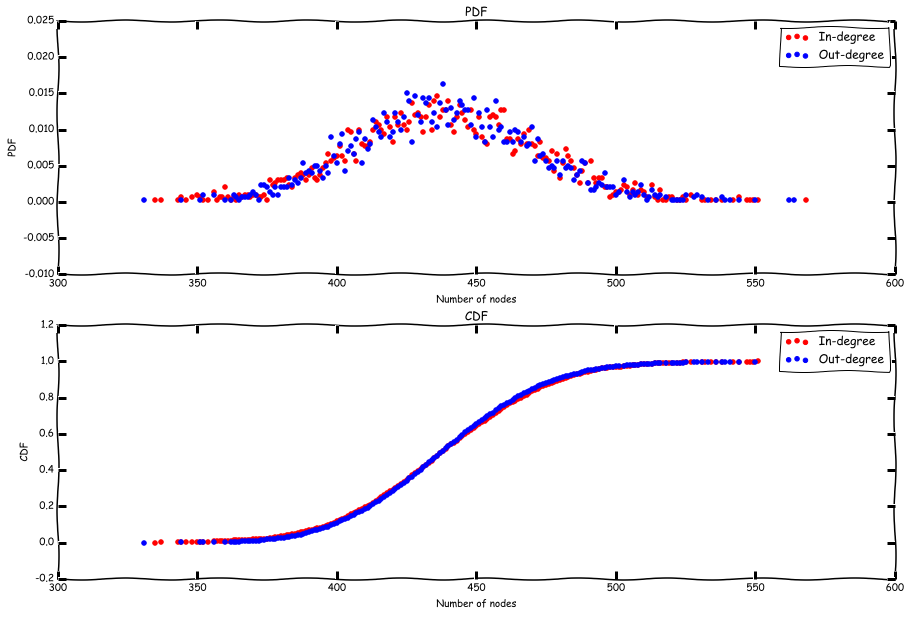

In [342]:
#number of nodes
n = 3000
#number of edges on each step
q = 0.4

G = dir_vertex_copying_graph(n, q)

out_deg = out_degree_histogram(G)
in_deg = in_degree_histogram(G)

in_PDF = pd.Series(in_deg[1:][0]) / n
in_CDF = np.cumsum(in_PDF)
out_PDF = pd.Series(out_deg[1:][0]) / n
out_CDF = np.cumsum(out_PDF)

#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
s1 = ax.scatter(in_deg[0:][0], in_PDF, color = 'red')
s2 = ax.scatter(out_deg[0:][0], out_PDF, color = 'blue')
ax.legend((s1, s2), ('In-degree', 'Out-degree'))
ax.set_title('PDF')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('PDF')

ax2 = plt.subplot(212)
s3 = ax2.scatter(in_deg[0:][0], in_CDF, color = 'red')
s4 = ax2.scatter(out_deg[0:][0], out_CDF, color = 'blue')
ax2.legend((s3, s4), ('In-degree', 'Out-degree'))
ax2.set_title('CDF')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('CDF')

Both in-degree and out-degree look similar and they look like Normal distrubution with slightly different parameters. Mean in in-degree distribution is slightly more than in the out-degree one.

Let's illustrate the following dependicies:
- average path length to the number of nodes
- average clustering coefficient to the number of nodes
- average node degee to the nodes "age"

Average path length and clustering coefficient to the number of nodes
There will be several dependicies for different parameter m. 
In order to save computional time, there will be two q parameters (0.2 and 0.9) and n range from 1000 to 3000 with step of 200. Print j is used to track the process, which can take more than hour.

In [362]:
n_test = list(np.linspace(1000, 3000, 11))
q_test = [0.2, 0.9]

av_clust_coef = np.matlib.zeros((len(n_test),len(q_test)))
av_path_length = np.matlib.zeros((len(n_test),len(q_test)))


for i in q_test:
    for j in n_test:
        G_test = dir_vertex_copying_graph(int(j), i)
        av_path_length[n_test.index(j), q_test.index(i)] = nx.average_shortest_path_length(G_test)
        av_clust_coef[n_test.index(j), q_test.index(i)] = nx.transitivity(G_test)
        print j

1000.0
1200.0
1400.0
1600.0
1800.0
2000.0
2200.0
2400.0
2600.0
2800.0
3000.0
1000.0
1200.0
1400.0
1600.0
1800.0
2000.0
2200.0
2400.0
2600.0
2800.0
3000.0


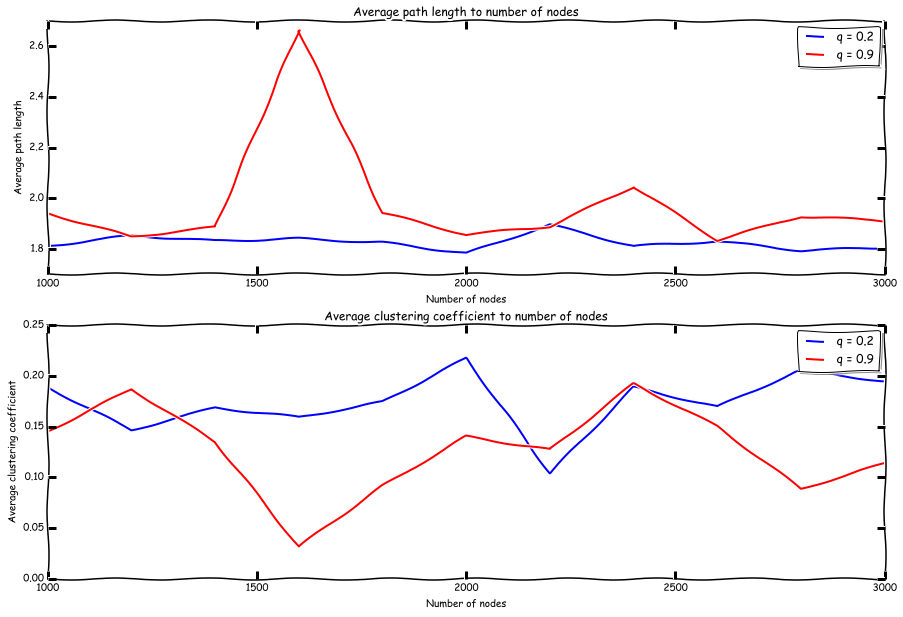

In [369]:
#plot
fig = plt.figure(2)
fig.set_size_inches(15, 10, forward=True)
ax = plt.subplot(211)
ax.plot(n_test[:], av_path_length[:,0], label = 'q = 0.2')
ax.plot(n_test, av_path_length[:,1], label = 'q = 0.9')
ax.legend(loc='upper right', shadow=True)
ax.set_title('Average path length to number of nodes')
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Average path length')

ax2 = plt.subplot(212)
ax2.plot(n_test, av_clust_coef[:,0], label = 'q = 0.2')
ax2.plot(n_test, av_clust_coef[:,1], label = 'q = 0.9')
ax2.legend(loc='upper right', shadow=True)
ax2.set_title('Average clustering coefficient to number of nodes')
ax2.set_xlabel('Number of nodes')
ax2.set_ylabel('Average clustering coefficient')

Now, it looks like the same result with undirected graph. It could be possible due to the same nature of models. It hard to make assumtions about the dependency in these pictures. The hypothesis is that avearge path length does not depend on the number of nodes and q. And the same hypothesis for average CC.

Average node degee to the nodes "age". It is better to see three different q parameters, because they leads to different results.

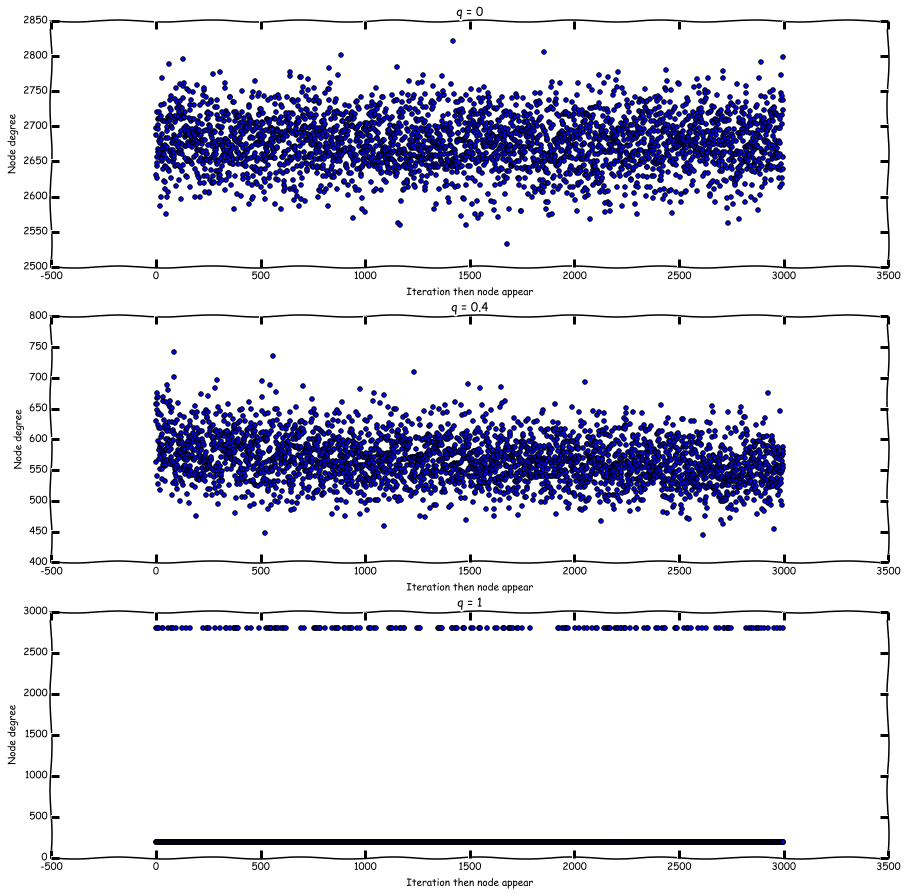

In [373]:
#script to look at average node degee to the nodes "age"
n = 3000
q = [0, 0.4, 1]
G1 = dir_vertex_copying_graph(n,q[0])
G2 = dir_vertex_copying_graph(n,q[1])
G3 = dir_vertex_copying_graph(n,q[2])


deg1 = nx.degree(G1)
deg2 = nx.degree(G2)
deg3 = nx.degree(G3)
nodes_age = deg1.keys()
nodes_age[:2] = [0]*2

node_degree1 = deg1.values()
node_degree2 = deg2.values()
node_degree3 = deg3.values()

fig = plt.figure(3)
fig.set_size_inches(15, 15, forward=True)
ax = plt.subplot(311)
ax.scatter(nodes_age, node_degree1)
ax.set_title('q = 0')
ax.set_xlabel('Iteration then node appear')
ax.set_ylabel('Node degree')

ax1 = plt.subplot(312)
ax1.scatter(nodes_age, node_degree2)
ax1.set_title('q = 0.4')
ax1.set_xlabel('Iteration then node appear')
ax1.set_ylabel('Node degree')

ax2 = plt.subplot(313)
ax2.scatter(nodes_age, node_degree3)
ax2.set_title('q = 1')
ax2.set_xlabel('Iteration then node appear')
ax2.set_ylabel('Node degree')

There also the same results.
There are three different dependencies. First, in the case of q = 0, there is no dependency. All node degrees is equally distributed acrooss the mean value.
Second, in the case of q = 0.4 (0<q<1), the some trend is observed. Older degrees have a slightly higher node degree than a younger ones. Moreover, this trend looks like a linear.
Thirdly, in the case of q = 1, there are only two possibe degrees: 2806 and 194. And quantity of nodes with 2856 degree is less.